In [103]:
#imports
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib as mpl


In [104]:
#fits

In [105]:
#utils

In [106]:
# def loadDataset()-> DataFrame:
#     return pd.read_csv('dataset/car data.csv')

# def loadDataset2()-> DataFrame:
#     return pd.read_csv('dataset/car data2.csv')


def loadDataset3()-> DataFrame:
    return pd.read_csv('dataset/car data.csv')

In [107]:
# dt = loadDataset()
# display(len(dt))
# display(dt.describe())
# display(dt.isnull().sum())

# dt = loadDataset2()
# display(len(dt))
# display(dt.describe())
# display(dt.isnull().sum())


dt = loadDataset3()
display(len(dt))
display(dt.describe())
display(dt.isnull().sum())
display(dt.head(5))
# nada null

301

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [108]:
display(dt.duplicated().sum())
display(len(dt))
display(len(dt.drop_duplicates()))

2

301

299

In [109]:
dt.drop('Car_Name',axis=1,inplace=True)
#max 2018
dt2 = dt.copy()
maximum=dt2['Year'].max() + 6
display(maximum )
Age=dt2['Year'].apply(lambda x:(maximum+1)-x)
dt2.drop('Year',axis=1,inplace=True)
dt2.insert(0,'Age',Age);dt2

# em vez de ano vejo quanto anos o carro  tem

2024

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,11,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,9,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,10,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,16,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,8,11.50,12.50,9000,Diesel,Dealer,Manual,0


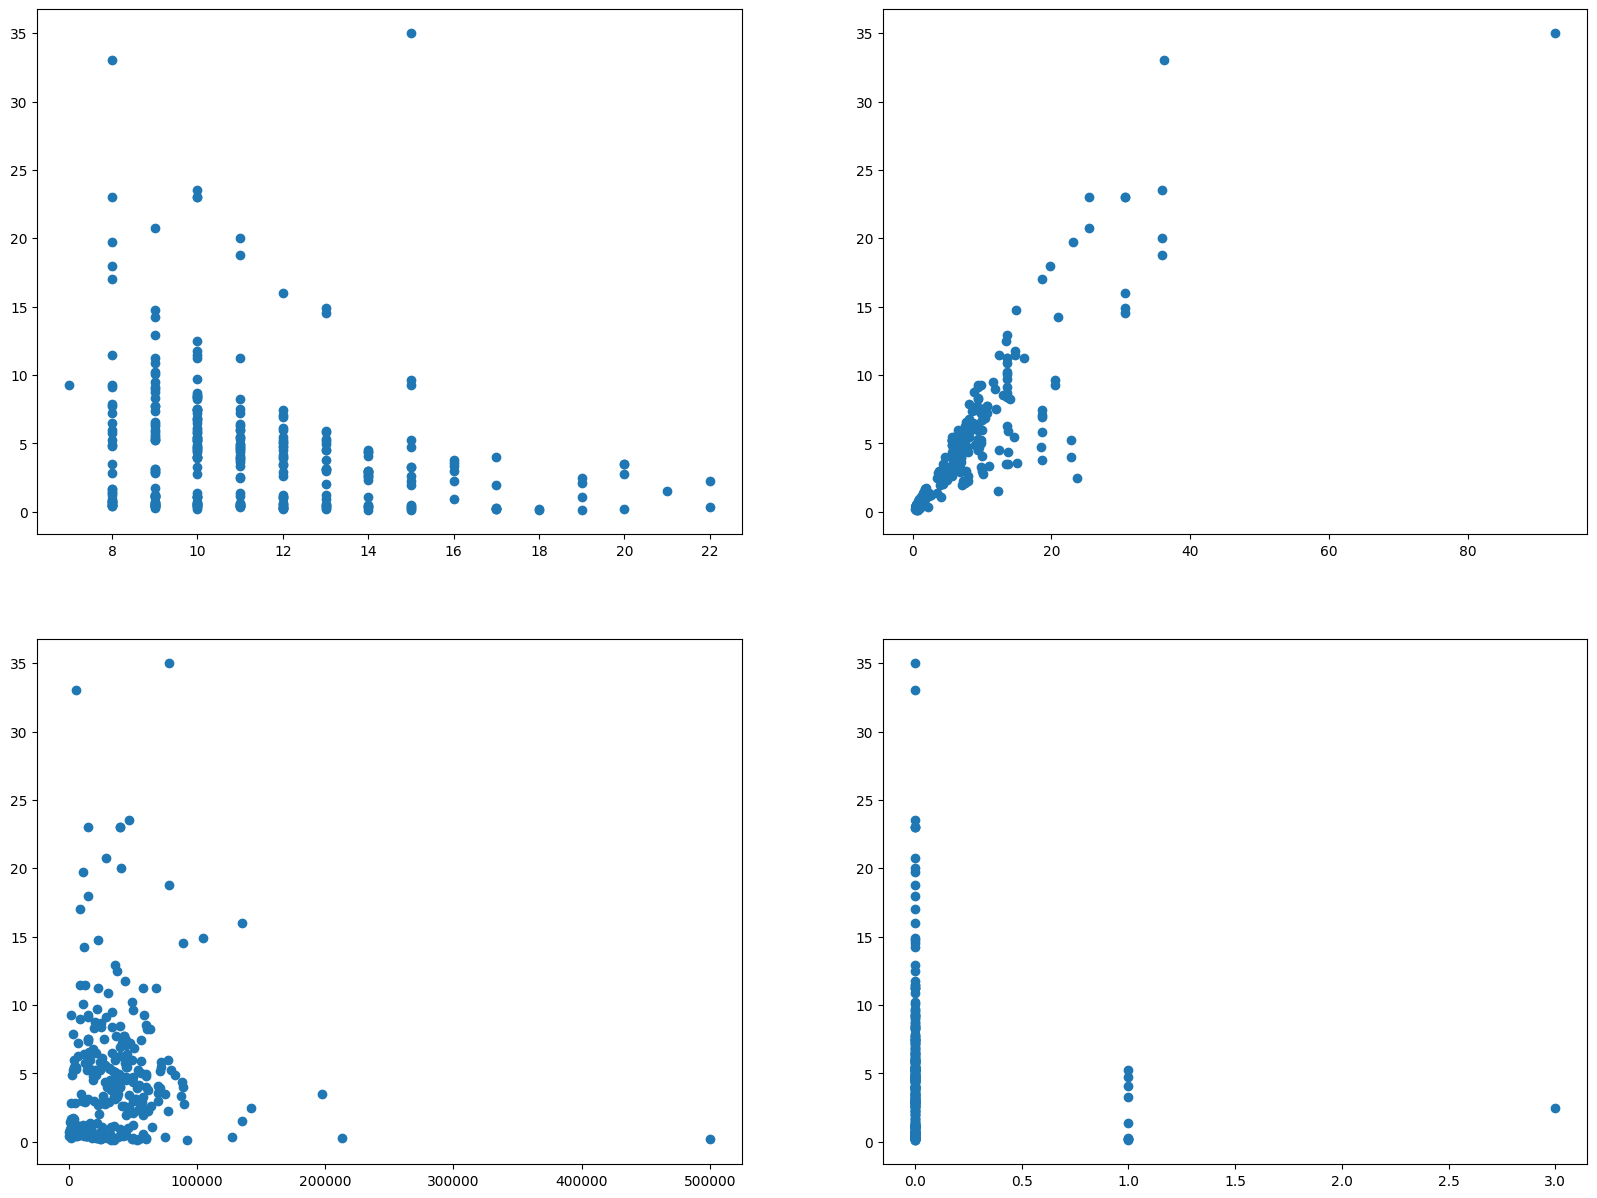

In [110]:
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)
ax0=fig.add_subplot(fs[0:1,0:1])
ax0.scatter(dt2['Age'],dt2['Selling_Price'])

ax1=fig.add_subplot(fs[0:1,1:])
ax1.scatter(dt2['Present_Price'],dt2['Selling_Price'])

ax2=fig.add_subplot(fs[1:2,0:1])
ax2.scatter(dt2['Kms_Driven'],dt2['Selling_Price'])

ax3=fig.add_subplot(fs[1:2,1:])
ax3.scatter(dt2['Owner'],dt2['Selling_Price'])

In [113]:

index1 = (dt2[(dt2['Present_Price']>80)])
index2 = (dt2[(dt2['Kms_Driven']>450000)])
display(index1, index2)

dt3 = dt2.copy()

dt3.drop(index=[86,196],inplace=True)
dt3.reset_index(drop=True,inplace=True)

#one hot enconde
dt3 = pd.get_dummies(dt3, columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

display(dt3.head())

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,15,35.0,92.6,78000,Diesel,Dealer,Manual,0


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,17,0.17,0.52,500000,Petrol,Individual,Automatic,0


,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,11,3.35,5.59,27000,0,False,True,False,True
1,12,4.75,9.54,43000,0,True,False,False,True
2,8,7.25,9.85,6900,0,False,True,False,True
3,14,2.85,4.15,5200,0,False,True,False,True
4,11,4.60,6.87,42450,0,True,False,False,True


<Axes: >

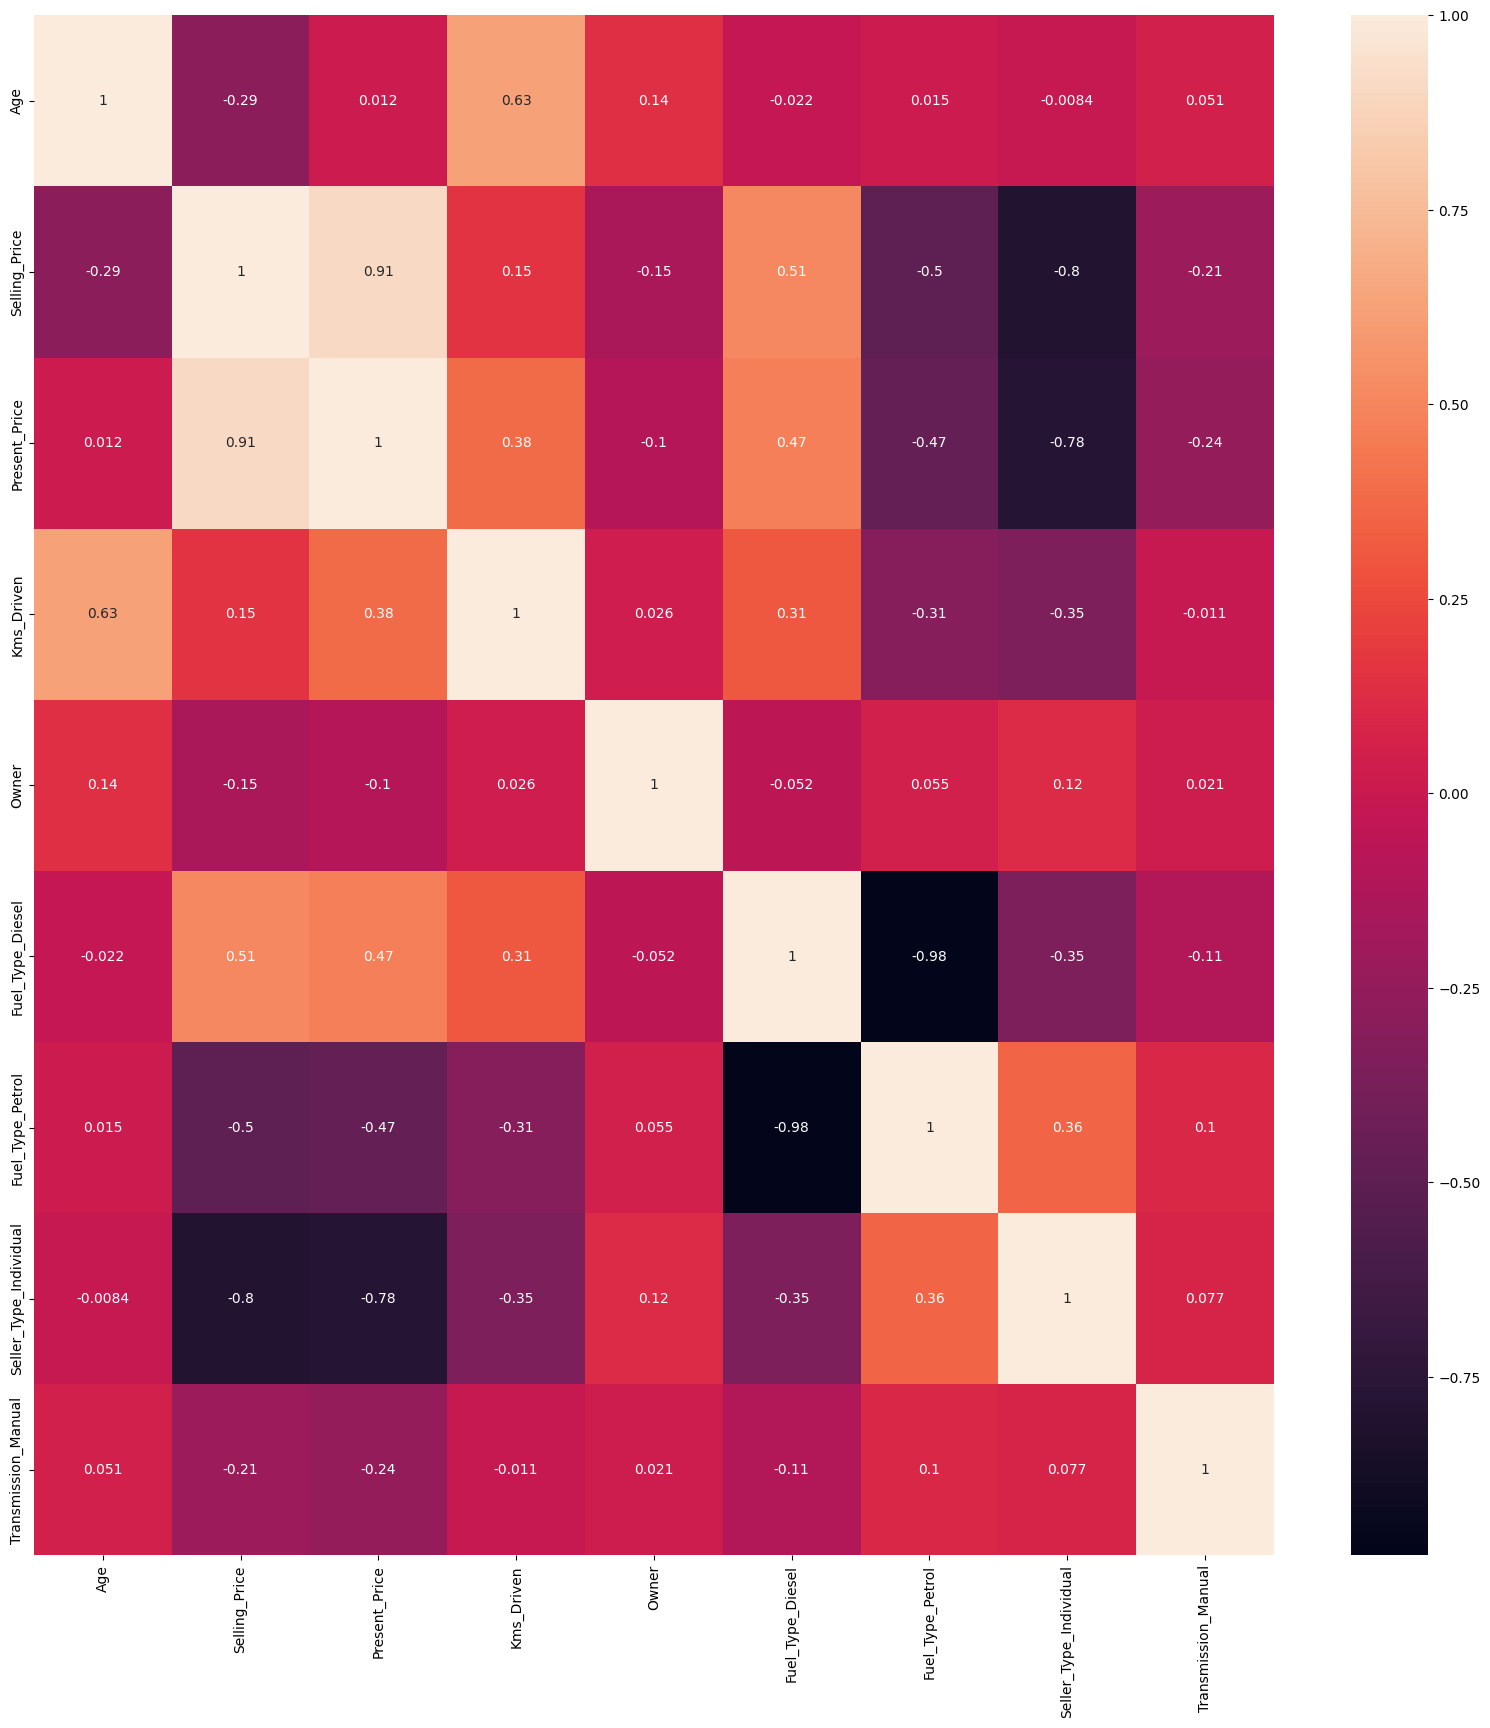

In [114]:
c=dt3.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True)